In [1]:
%pprint

Pretty printing has been turned OFF


## 2016 Election Project
### Part 3 of Processing Pipeline

This notebook is intended to document analysis of my data throughout this project. The data I am starting out with are transcripts of the presidential debates from the 2016 US Election- the 10 Democratic primary debates, the 12 Republican primary debates, and the debates for the general election between Hillary Clinton and Donald Trump. The transcripts were taken from UCSB's American Presidency Project. The citations for these transcripts can be found in the README. Using these transcripts I'll analyze the referring expressions the candidates use for each other, try classifying utterance by each candidate, and perhaps a classifer to sort different types of referring expressions (i.e. female, male, professional).

In [2]:
import nltk
from nltk.corpus import PlaintextCorpusReader
import pandas as pd
import glob
import os
from collections import defaultdict
import matplotlib.pyplot as plt
import pickle

In [3]:
f = open('/Users/Paige/Documents/Data_Science/link_dict.pkl', 'rb')
link_dict = pickle.load(f)
f.close()

In [4]:
f = open('/Users/Paige/Documents/Data_Science/master_df.pkl', 'rb')
master_df = pickle.load(f)
f.close
master_df = master_df.reset_index(drop=True)
master_df.head()

,Date,Debate Type,Speaker,Sents,Tree
0,1-14-16,primary_rep,CAVUTO,It is 9:00 p.m. here at the North Charleston ...,"[(It, PRP), (is, VBZ), (9:00, CD), (p.m., NN),..."
1,1-14-16,primary_rep,CAVUTO,Welcome to the sixth Republican presidential o...,"[(Welcome, VB), (to, TO), (the, DT), (sixth, J..."
2,1-14-16,primary_rep,CAVUTO,"I'm Neil Cavuto, alongside my friend and co-mo...","[(I, PRP), ('m, VBP), [(Neil, JJ), (Cavuto, NN..."
3,1-14-16,primary_rep,BARTIROMO,Tonight we are working with Facebook to ask t...,"[(Tonight, NN), (we, PRP), (are, VBP), (workin..."
4,1-14-16,primary_rep,BARTIROMO,"And according to Facebook, the U.S. election h...","[(And, CC), (according, VBG), (to, TO), [(Face..."


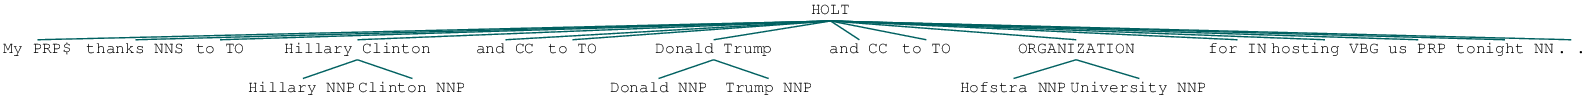

In [5]:
master_df.iloc[-2][-1]

**I'm going to create a mapping function that will make it easier to see if a person is being talked about in a particular utterance. This function is just going to create a set of all of the entity labels that appear in the tree. Then, to see if a person is being referred to in a particular utterance, we can just see if they are in that set instead of traversing the tree each time.**

In [6]:
def entity_tracking(tree):
    name = ''
    referred_to = []
    entities = set(link_dict.values())
    for chunk in tree:
        if hasattr(chunk, 'label'):
            if chunk.label() in entities:
                referred_to.append(chunk.label())
                    
    return list(set(referred_to))

In [7]:
master_df['Entities'] = master_df.Tree.map(entity_tracking)
master_df.head()

,Date,Debate Type,Speaker,Sents,Tree,Entities
0,1-14-16,primary_rep,CAVUTO,It is 9:00 p.m. here at the North Charleston ...,"[(It, PRP), (is, VBZ), (9:00, CD), (p.m., NN),...",[]
1,1-14-16,primary_rep,CAVUTO,Welcome to the sixth Republican presidential o...,"[(Welcome, VB), (to, TO), (the, DT), (sixth, J...",[]
2,1-14-16,primary_rep,CAVUTO,"I'm Neil Cavuto, alongside my friend and co-mo...","[(I, PRP), ('m, VBP), [(Neil, JJ), (Cavuto, NN...","[Neil Cavuto, Maria Bartiromo]"
3,1-14-16,primary_rep,BARTIROMO,Tonight we are working with Facebook to ask t...,"[(Tonight, NN), (we, PRP), (are, VBP), (workin...",[]
4,1-14-16,primary_rep,BARTIROMO,"And according to Facebook, the U.S. election h...","[(And, CC), (according, VBG), (to, TO), [(Face...",[]


**Here is a distribution across the candidates that remained in the race until the last primary debate.**

In [8]:
ner_categories = defaultdict(int)

# Create the nested for loop
for tree in master_df['Tree']:
    for chunk in tree:
        if hasattr(chunk, 'label') and chunk.label() not in ['GPE', 'ORGANIZATION', 'PERSON', 'LOCATION', 'GSP', 'FACILITY' ]:
            ner_categories[chunk.label()] += 1
     
for category in sorted(ner_categories, key=ner_categories.get, reverse=True):
    print(category, ner_categories[category])

Hillary Clinton 1071
Donald Trump 950
Barack Obama 540
Bernie Sanders 536
Marco Rubio 350
Ted Cruz 320
Jeb Bush 238
Chris Christie 205
Ben Carson 202
TITLE 188
John Kasich 167
Bashar al-Assad 137
Ronald Reagan 135
Rand Paul 114
Martin O'Malley 110
Vladimir Putin 105
Carly Fiorina 85
Dana Bash 67
Jake Tapper 66
Anderson Cooper 65
Wolf Blitzer 59
John Kerry 46
Muammar Gaddafi 46
Maria Celeste Arraras 45
Martha Raddatz 45
Megyn Kelly 41
David Muir 40
Mike Huckabee 38
George W. Bush 37
Jim Webb 33
Lester Holt 32
Bill Clinton 30
Scott Walker 30
Bret Baier 29
Saddam Hussein 28
Neil Cavuto 27
Mitt Romney 26
Andrea Mitchell 19
Osama bin Laden 18
Don Lemon 17
Jeff Sessions 17
Chuck Schumer 16
Edward Snowden 16
Hugh Hewitt 15
Nancy Pelosi 14
Antonin Scalia 14
John McCain 13
Joe Biden 12
Carl Quintanilla 12
Sean Hannity 12
Rachel Maddow 12
NICKNAME 11
Nikki Haley 10
Lindsey Graham 10
Benjamin Netanyahu 10
Kim Jong Un 10
James Carter 9
George Bush 8
Theodore Roosevelt 8
Abraham Lincoln 8
Fidel Cas

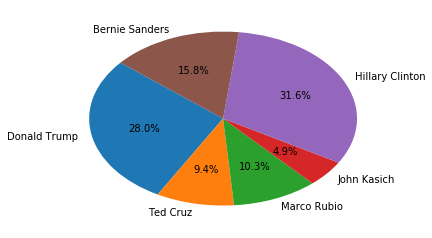

In [9]:
#This section is with help from a datacamp tutorial
#https://campus.datacamp.com/courses/natural-language-processing-fundamentals-in-python/named-entity-recognition?ex=3

ner_categories = defaultdict(int)

# Create the nested for loop
for tree in master_df['Tree']:
    for chunk in tree:
        if hasattr(chunk, 'label'):
            if chunk.label() in ['Hillary Clinton', 'Donald Trump', 'Bernie Sanders', 'Ted Cruz', 'Marco Rubio', 'John Kasich']:
                ner_categories[chunk.label()] += 1
            
# Create a list from the dictionary keys for the chart labels: labels
labels = list(ner_categories.keys())

# Create a list of the values: values
values = [ner_categories.get(l) for l in labels]

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

# Display the chart
plt.show()

**Let's build a data frame for each speaker with only their utterances in it.**

In [10]:
#There are 81 different speakers
speaker_counts = master_df['Speaker'].value_counts()
speaker_counts.size

82

In [11]:
#These are the top 20 speakers who had the most utterances. A larger count doesn't necissarilly 
#mean a speaker spoke for more time than another, just that they used more sentences.
speaker_counts[:20]

TRUMP        5997
CLINTON      4903
SANDERS      3546
RUBIO        2602
CRUZ         2117
KASICH       1970
BUSH         1461
OMALLEY      1076
CHRISTIE     1018
CARSON        971
COOPER        790
BLITZER       755
PAUL          752
TAPPER        677
WALLACE       655
FIORINA       614
KELLY         493
MUIR          488
DICKERSON     481
HOLT          420
Name: Speaker, dtype: int64

In [12]:
speakers = list(speaker_counts.index)
speakers

['TRUMP', 'CLINTON', 'SANDERS', 'RUBIO', 'CRUZ', 'KASICH', 'BUSH', 'OMALLEY', 'CHRISTIE', 'CARSON', 'COOPER', 'BLITZER', 'PAUL', 'TAPPER', 'WALLACE', 'FIORINA', 'KELLY', 'MUIR', 'DICKERSON', 'HOLT', 'BAIER', 'RADDATZ', 'CUOMO', 'BASH', 'HUCKABEE', 'BARTIROMO', 'CAVUTO', 'WALKER', 'HEWITT', 'QUESTION', 'TODD', 'WEBB', 'QUINTANILLA', 'CHAFEE', 'QUICK', 'HARWOOD', 'SALINAS', 'MADDOW', 'RAMOS', 'BAKER', 'WOODRUFF', 'IFILL', 'MITCHELL', 'TUMULTY', 'LEMON', 'ARRARÁS', 'GARRETT', 'CORDES', 'LOUIS', 'MCELVEEN', 'HAM', 'DINAN', 'STRASSEL', 'UNKNOWN', 'COONEY', 'LOPEZ', 'EPPERSON', 'OBRADOVICH', 'SANTELLI', 'CRAMER', 'ANNOUNCER', 'LEVESQUE', 'GOODSON', 'BROWNLEE', 'BISHOP', 'FRANTA', 'LASSEN', 'MODERATOR', 'PERRY', 'CRAWFORD', 'PANELISTS', 'SMITH', 'WILKINS', 'ALEXIS', 'ClINTON', 'ROSENGREN', 'PLUMMER', 'AUDIENCE', 'UNIDENTIFIABLE', 'HANNITY', 'MALE', 'COLLISON']

In [13]:
'SANTORUM' in speakers

False

In [14]:
speaker_dfs = []
for speaker in speakers:
    df = master_df.loc[master_df['Speaker']==speaker, :]
    speaker_dfs.append(df)

**First, let's focus on the candidates. The ultimate goal of this project is to focus on the referring expressions Hillary Clinton and Donald Trump use for each other, but analyzing how they refer to other candidates, and other candidates them can be helpful in comparison.**

In [15]:
trump = speaker_dfs[0]
clinton = speaker_dfs[1]
sanders = speaker_dfs[2]
rubio = speaker_dfs[3]
cruz = speaker_dfs[4]
kasich = speaker_dfs[5]
bush = speaker_dfs[6]
omalley = speaker_dfs[7]
christie = speaker_dfs[8]
carson = speaker_dfs[9]
paul = speaker_dfs[12]
fiorina = speaker_dfs[15]
huckabee = speaker_dfs[24]
walker = speaker_dfs[27]
webb = speaker_dfs[31]
chafee = speaker_dfs[33]


In [16]:
trump.head()

,Date,Debate Type,Speaker,Sents,Tree,Entities
170,1-14-16,primary_rep,TRUMP,"It's not fear and terror, it's reality.","[(It, PRP), ('s, VBZ), (not, RB), (fear, JJ), ...",[]
171,1-14-16,primary_rep,TRUMP,"You just have to look today at Indonesia, bomb...","[(You, PRP), (just, RB), (have, VBP), (to, TO)...",[]
172,1-14-16,primary_rep,TRUMP,"[applause]\n\nYou look at California, you look...","[([, NN), (applause, NN), (], NNP), (You, PRP)...",[]
173,1-14-16,primary_rep,TRUMP,"They're very, very badly wounded.","[(They, PRP), ('re, VBP), (very, RB), (,, ,), ...",[]
174,1-14-16,primary_rep,TRUMP,They will — some will follow.,"[(They, PRP), (will, MD), (—, VB), (some, DT),...",[]


In [17]:
clinton.head()

,Date,Debate Type,Speaker,Sents,Tree,Entities
1617,1-17-16,primary_dem,CLINTON,"Well, good evening.","[(Well, RB), (,, ,), (good, JJ), (evening, NN)...",[]
1618,1-17-16,primary_dem,CLINTON,And I want to thank the Congressional Black Ca...,"[(And, CC), (I, PRP), (want, VBP), (to, TO), (...",[]
1619,1-17-16,primary_dem,CLINTON,"You know, I remember well when my youth minist...","[(You, PRP), (know, VBP), (,, ,), (I, PRP), (r...",[]
1620,1-17-16,primary_dem,CLINTON,I was a teenager.,"[(I, PRP), (was, VBD), (a, DT), (teenager, NN)...",[]
1621,1-17-16,primary_dem,CLINTON,"And his moral clarity, the message that he con...","[(And, CC), (his, PRP$), (moral, JJ), (clarity...",[]


In [18]:
sanders.head()

,Date,Debate Type,Speaker,Sents,Tree,Entities
1632,1-17-16,primary_dem,SANDERS,Thank you.,"[(Thank, NNP), (you, PRP), (., .)]",[]
1633,1-17-16,primary_dem,SANDERS,As we honor the extraordinary life of Dr. Mart...,"[(As, IN), (we, PRP), (honor, VBP), (the, DT),...",[]
1634,1-17-16,primary_dem,SANDERS,"As we look out at our country today, what the ...","[(As, IN), (we, PRP), (look, VBP), (out, RP), ...",[]
1635,1-17-16,primary_dem,SANDERS,"And then, to make a bad situation worse, we ha...","[(And, CC), (then, RB), (,, ,), (to, TO), (mak...",[]
1636,1-17-16,primary_dem,SANDERS,This campaign is about a political revolution ...,"[(This, DT), (campaign, NN), (is, VBZ), (about...",[]


In [19]:
rubio.head()

,Date,Debate Type,Speaker,Sents,Tree,Entities
133,1-14-16,primary_rep,RUBIO,"Yeah, I would go, first of all, one step furt...","[(Yeah, UH), (,, ,), (I, PRP), (would, MD), (g...",[Hillary Clinton]
134,1-14-16,primary_rep,RUBIO,"She wouldn't just be a disaster, Hillary Clint...","[(She, PRP), (would, MD), (n't, RB), (just, RB...",[Hillary Clinton]
135,1-14-16,primary_rep,RUBIO,[applause]\n\nSomeone who cannot handle intell...,"[([, NN), (applause, NN), (], NNP), (Someone, ...",[]
136,1-14-16,primary_rep,RUBIO,Ever.,"[(Ever, RB), (., .)]",[]
137,1-14-16,primary_rep,RUBIO,"[applause]\n\nOn the issue of Barack Obama, Ba...","[([, NN), (applause, NN), (], NN), (On, IN), (...",[Barack Obama]


In [20]:
cruz.head()

,Date,Debate Type,Speaker,Sents,Tree,Entities
25,1-14-16,primary_rep,CRUZ,"Well, Maria, thank you for that question, and...","[(Well, RB), (,, ,), [(Maria, NNP)], (,, ,), (...",[Maria Celeste Arraras]
26,1-14-16,primary_rep,CRUZ,Let me start — I want to get to the substance ...,"[(Let, VB), (me, PRP), (start, VB), (—, FW), (...",[]
27,1-14-16,primary_rep,CRUZ,"Today, many of us picked up our newspapers, an...","[(Today, NN), (,, ,), (many, JJ), (of, IN), (u...",[]
28,1-14-16,primary_rep,CRUZ,"In that State of the Union, President Obama di...","[(In, IN), (that, DT), (State, NNP), (of, IN),...",[Barack Obama]
29,1-14-16,primary_rep,CRUZ,President Obama's preparing to send $100 billi...,"[[(President, NNP), (Obama, NNP)], ('s, POS), ...",[Barack Obama]


In [21]:
kasich.head()

,Date,Debate Type,Speaker,Sents,Tree,Entities
48,1-14-16,primary_rep,KASICH,"Look, it takes three things basically to grow...","[[(Look, NN)], (,, ,), (it, PRP), (takes, VBZ)...",[]
49,1-14-16,primary_rep,KASICH,And I've done it when I was in Washington when...,"[(And, CC), (I, PRP), ('ve, VBP), (done, VBN),...",[]
50,1-14-16,primary_rep,KASICH,And our economy was growing like crazy.,"[(And, CC), (our, PRP$), (economy, NN), (was, ...",[]
51,1-14-16,primary_rep,KASICH,It's the same thing that I did in Ohio.,"[(It, PRP), ('s, VBZ), (the, DT), (same, JJ), ...",[]
52,1-14-16,primary_rep,KASICH,It's a simple formula: common sense regulation...,"[(It, PRP), ('s, VBZ), (a, DT), (simple, JJ), ...",[]


In [22]:
bush.head()

,Date,Debate Type,Speaker,Sents,Tree,Entities
103,1-14-16,primary_rep,BUSH,"Well first of all, the idea that somehow we'r...","[(Well, NNP), (first, RB), (of, IN), (all, DT)...",[Barack Obama]
104,1-14-16,primary_rep,BUSH,The simple fact is that the world has been tor...,"[(The, DT), (simple, JJ), (fact, NN), (is, VBZ...",[]
105,1-14-16,primary_rep,BUSH,Think about it.,"[(Think, VBP), (about, IN), (it, PRP), (., .)]",[]
106,1-14-16,primary_rep,BUSH,"With grandiose language, the president talks a...","[(With, IN), (grandiose, JJ), (language, NN), ...",[]
107,1-14-16,primary_rep,BUSH,"He's missing the whole point, that America's l...","[(He, PRP), ('s, VBZ), (missing, VBG), (the, D...",[]


In [23]:
omalley.head()

,Date,Debate Type,Speaker,Sents,Tree,Entities
1639,1-17-16,primary_dem,OMALLEY,Thank you.,"[(Thank, NNP), (you, PRP), (., .)]",[]
1640,1-17-16,primary_dem,OMALLEY,"My name is Martin O'Malley, I was born the yea...","[(My, PRP$), (name, NN), (is, VBZ), [(Martin, ...",[Martin O'Malley]
1641,1-17-16,primary_dem,OMALLEY,And I want to thank the people of South Caroli...,"[(And, CC), (I, PRP), (want, VBP), (to, TO), (...",[]
1642,1-17-16,primary_dem,OMALLEY,"You taught us, in fact, in keeping with Dr. Ki...","[(You, PRP), (taught, VBP), (us, PRP), (,, ,),...",[]
1643,1-17-16,primary_dem,OMALLEY,"Eight years ago, you brought forward a new lea...","[(Eight, CD), (years, NNS), (ago, RB), (,, ,),...",[Barack Obama]


In [24]:
christie.head()

,Date,Debate Type,Speaker,Sents,Tree,Entities
76,1-14-16,primary_rep,CHRISTIE,"Well, Maria, I'm glad to have heard from you ...","[(Well, RB), (,, ,), [(Maria, NNP)], (,, ,), (...",[Maria Celeste Arraras]
77,1-14-16,primary_rep,CHRISTIE,"Because Tuesday night, I watched story time wi...","[(Because, IN), (Tuesday, NNP), (night, NN), (...",[Barack Obama]
78,1-14-16,primary_rep,CHRISTIE,"And I've got to tell you, it sounded like ever...","[(And, CC), (I, PRP), ('ve, VBP), (got, VBN), ...",[]
79,1-14-16,primary_rep,CHRISTIE,"[applause]\n\nThe fact is, there's a number of...","[([, NN), (applause, NN), (], VBZ), (The, DT),...",[]
80,1-14-16,primary_rep,CHRISTIE,The first thing is we have to strengthen our a...,"[(The, DT), (first, JJ), (thing, NN), (is, VBZ...",[]


In [25]:
carson.head()

,Date,Debate Type,Speaker,Sents,Tree,Entities
150,1-14-16,primary_rep,CARSON,"Well, I'm very happy to get a question this e...","[(Well, RB), (,, ,), (I, PRP), ('m, VBP), (ver...",[]
151,1-14-16,primary_rep,CARSON,I was going to ask you to wake me up when that...,"[(I, PRP), (was, VBD), (going, VBG), (to, TO),...",[]
152,1-14-16,primary_rep,CARSON,"[laughter]\n\nYou know, I find it really quite...","[([, JJ), (laughter, NN), (], NNP), (You, PRP)...",[]
153,1-14-16,primary_rep,CARSON,The fact of the matter is he doesn't realize t...,"[(The, DT), (fact, NN), (of, IN), (the, DT), (...",[]
154,1-14-16,primary_rep,CARSON,Not armies massively marching on each other an...,"[(Not, RB), (armies, NNS), (massively, RB), (m...",[]


In [26]:
paul.head()

,Date,Debate Type,Speaker,Sents,Tree,Entities
4168,1-28-16,primary_rep,PAUL,"You know, I've always had a great deal of res...","[(You, PRP), (know, VBP), (,, ,), (I, PRP), ('...",[]
4169,1-28-16,primary_rep,PAUL,There's probably no person I respect more in t...,"[(There, EX), ('s, VBZ), (probably, RB), (no, ...",[]
4170,1-28-16,primary_rep,PAUL,I think he was probably the most honest man in...,"[(I, PRP), (think, VBP), (he, PRP), (was, VBD)...",[]
4171,1-28-16,primary_rep,PAUL,And so in no way have I ever said that I don't...,"[(And, CC), (so, RB), (in, IN), (no, DT), (way...",[]
4172,1-28-16,primary_rep,PAUL,I think what's interesting about where that li...,"[(I, PRP), (think, VBP), (what, WP), ('s, VBZ)...",[Ted Cruz]


In [27]:
fiorina.head()

,Date,Debate Type,Speaker,Sents,Tree,Entities
8411,10-28-15,primary_rep,FIORINA,"Well, gee, after the last debate, I was told ...","[(Well, RB), (,, ,), (gee, NNS), (,, ,), (afte...",[]
8412,10-28-15,primary_rep,FIORINA,[laughter],"[([, JJ), (laughter, NN), (], NN)]",[]
8414,10-28-15,primary_rep,FIORINA,But I also think that these are very serious ...,"[(But, CC), (I, PRP), (also, RB), (think, VBP)...",[]
8415,10-28-15,primary_rep,FIORINA,I agree with them.,"[(I, PRP), (agree, VBP), (with, IN), (them, PR...",[]
8416,10-28-15,primary_rep,FIORINA,"And this big powerful, corrupt bureaucracy wor...","[(And, CC), (this, DT), (big, JJ), (powerful, ...",[]


In [28]:
huckabee.head()

,Date,Debate Type,Speaker,Sents,Tree,Entities
8373,10-28-15,primary_rep,HUCKABEE,"Well, John, I don't really have any weaknesse...","[(Well, RB), (,, ,), [(John, NNP)], (,, ,), (I...",[]
8374,10-28-15,primary_rep,HUCKABEE,[laughter]\n\nBut my wife is down here in the ...,"[([, JJ), (laughter, NN), (], NN), (But, CC), ...",[]
8375,10-28-15,primary_rep,HUCKABEE,"If I have a weakness, it's that I try to live ...","[(If, IN), (I, PRP), (have, VBP), (a, DT), (we...",[]
8376,10-28-15,primary_rep,HUCKABEE,"I try to live by the rules, no matter what the...","[(I, PRP), (try, VBP), (to, TO), (live, VB), (...",[]
8377,10-28-15,primary_rep,HUCKABEE,Play by the rules.,"[[(Play, NN)], (by, IN), (the, DT), (rules, NN...",[]


In [29]:
walker.head()

,Date,Debate Type,Speaker,Sents,Tree,Entities
31880,8-6-15,primary_rep,WALKER,"Well, I'm pro-life, I've always been pro-life...","[(Well, RB), (,, ,), (I, PRP), ('m, VBP), (pro...",[]
31881,8-6-15,primary_rep,WALKER,That's been consistently proven.,"[(That, DT), ('s, VBZ), (been, VBN), (consiste...",[]
31882,8-6-15,primary_rep,WALKER,"Unlike Hillary Clinton, who has a radical posi...","[(Unlike, IN), [(Hillary, NNP), (Clinton, NNP)...",[Hillary Clinton]
31883,8-6-15,primary_rep,WALKER,[applause],"[([, NN), (applause, NN), (], NN)]",[]
32040,8-6-15,primary_rep,WALKER,"Chris, I actually said that on your show earl...","[[(Chris, NNP)], (,, ,), (I, PRP), (actually, ...",[Chris Christie]


In [30]:
webb.head()

,Date,Debate Type,Speaker,Sents,Tree,Entities
5489,10-13-15,primary_dem,WEBB,Thank you.,"[(Thank, NNP), (you, PRP), (., .)]",[]
5490,10-13-15,primary_dem,WEBB,"You know, people are disgusted with the way th...","[(You, PRP), (know, VBP), (,, ,), (people, NNS...",[]
5491,10-13-15,primary_dem,WEBB,They're looking for a leader who understands h...,"[(They, PRP), ('re, VBP), (looking, VBG), (for...",[]
5492,10-13-15,primary_dem,WEBB,I have a record of working across the politica...,"[(I, PRP), (have, VBP), (a, DT), (record, NN),...",[]
5493,10-13-15,primary_dem,WEBB,I've also spent more than half of my professio...,"[(I, PRP), ('ve, VBP), (also, RB), (spent, VBN...",[]


In [31]:
chafee.head()

,Date,Debate Type,Speaker,Sents,Tree,Entities
5465,10-13-15,primary_dem,CHAFEE,"Thank you, Anderson.","[(Thank, NNP), (you, PRP), (,, ,), [(Anderson,...",[Anderson Cooper]
5466,10-13-15,primary_dem,CHAFEE,"Thank you, CNN, and thank you Facebook for org...","[(Thank, NNP), (you, PRP), (,, ,), [(CNN, NNP)...",[]
5467,10-13-15,primary_dem,CHAFEE,Not only will Americans be electing a new pres...,"[(Not, RB), (only, RB), (will, MD), (Americans...",[]
5468,10-13-15,primary_dem,CHAFEE,Voters should assess the candidate's experienc...,"[(Voters, NNS), (should, MD), (assess, VB), (t...",[]
5469,10-13-15,primary_dem,CHAFEE,I'm the only one running for president that ha...,"[(I, PRP), ('m, VBP), (the, DT), (only, JJ), (...",[]


**First, we're going to get some stats.**

In [32]:
trump[['Date', 'Debate Type', 'Speaker', 'Sents', 'Tree']].describe()

,Date,Debate Type,Speaker,Sents,Tree
count,5997,5997,5997,5997,5997
unique,14,2,1,5586,5521
top,9-26-16,primary_rep,TRUMP,[applause],"[([, NN), (applause, NN), (], NN)]"
freq,751,3963,5997,92,92


In [33]:
clinton[['Date', 'Debate Type', 'Speaker', 'Sents', 'Tree']].describe()

,Date,Debate Type,Speaker,Sents,Tree
count,4903,4903,4903,4903,4903
unique,13,2,1,4698,4684
top,4-14-16,primary_dem,CLINTON,[applause],"[([, NN), (applause, NN), (], NN)]"
freq,495,3673,4903,118,118


**These descriptions show that out of all of the debates, Trump had his most utterances in the 9-26-16 debate, and Clinton had her most utterances in the 4-14-16 debate. The most frequent "utterance" by both of these candidates was the transcription for applause. Based on these transcriptions, Clinton was applauded 118 times while Trump was applauded 92 times. Out of Trump's 5997 utterances, 5586 of those were unique. Somehow, there are less unique trees than there are unique utterances. I'm not quite sure how that is. Out of Clinton's 4903 utterances, 4698 of those were unique, and there are only 4684 unique trees.**

**Let's see all of the people Trump talks about.**

In [34]:
def get_entities(entities):
    all_ents = []
    for entity_list in entities:
        for ent in entity_list:
            all_ents.append(ent)
    return set(all_ents)

In [35]:
trump_referred_to = get_entities(trump['Entities'])

In [36]:
trump_referred_to

{'Sean Hannity', 'Marco Rubio', 'Hillary Clinton', 'Don Lemon', 'Mike Huckabee', 'Nikki Haley', 'Dana Bash', 'Maria Celeste Arraras', 'Elizabeth Warren', 'John Kerry', 'Michelle Obama', 'Donald Trump', 'Neil Cavuto', 'Carly Fiorina', 'Lindsey Graham', 'Mitt Romney', 'Benjamin Netanyahu', 'Hugh Hewitt', 'Lester Holt', 'Rudy Giuliani', 'Chris Christie', 'Ben Carson', 'John Kennedy', 'Anderson Cooper', "Tip O'Neill", 'David Duke', 'Bernie Sanders', 'Deborah Wasserman Schultz', 'Wolf Blitzer', 'Rick Santorum', 'Edward Snowden', 'Joe Arpaio', 'Antonin Scalia', "Rosie O'Donnell", 'Ted Cruz', 'Abraham Lincoln', 'Rosa Parks', 'Michael Bloomberg', 'Bashar al-Assad', 'George Bush', 'Megyn Kelly', 'John Podesta', 'Mitch McConnell', 'Ivanka Trump', 'Rand Paul', 'Ronald Reagan', 'Vladimir Putin', 'Eric Trump', 'Jake Tapper', 'Bret Baier', 'Carl Quintanilla', 'Jeb Bush', 'Angela Merkel', 'NICKNAME', 'TITLE', 'Muammar Gaddafi', 'Dwight Eisenhower', 'Nancy Pelosi', 'Bill Clinton', 'Saddam Hussein', 'B

In [37]:
clinton_referred_to = get_entities(clinton['Entities'])

In [38]:
clinton_referred_to

{'Harry Truman', 'Jim Webb', 'Hillary Clinton', 'Don Lemon', 'Nikki Haley', 'Nelson Mandela', 'Dana Bash', 'Rachel Maddow', 'George Washington', 'John Kerry', 'Elizabeth Warren', 'Ashraf Ghani', 'Michelle Obama', 'Donald Trump', 'Hosni Mubarak', 'Scott Walker', 'Lindsey Graham', 'Benjamin Netanyahu', 'George W. Bush', 'Lester Holt', 'John McCain', 'Martha Raddatz', 'David Muir', 'Joe Biden', 'Andrea Mitchell', 'Chris Christie', 'Anderson Cooper', 'Alicia Machado', 'David Duke', 'Yasser Arafat', 'Bernie Sanders', "Martin O'Malley", 'James Carter', 'Jorge Ramos', 'Tamir Rice', 'Al Gore', 'Eric Garner', 'Wolf Blitzer', 'Chris Cuomo', 'Abraham Lincoln', 'Osama bin Laden', 'Michael Brown', 'Bashar al-Assad', 'Ronald Reagan', 'Vladimir Putin', 'Jeb Bush', 'Chuck Todd', 'Lincoln Chafee', 'TITLE', 'Sandra Bland', 'Muammar Gaddafi', 'Trayvon Martin', 'Bill Clinton', 'Saddam Hussein', 'Barack Obama', 'Humayun Khan'}

In [39]:
def get_RE_for_label(trees, label):
    name = ''
    REs = []
    RE_trees = []
    for tree in trees:
        for chunk in tree:
            if hasattr(chunk, 'label'):
                if chunk.label()==label:
                    for leaf in chunk.leaves():
                        name+=' '+str(leaf[0])
                    name = name.strip()
                    REs.append(name)
                    name = ''
                else:
                    name = ''
    return REs

In [40]:
trump_REclinton = get_RE_for_label(trump['Tree'], 'Hillary Clinton')
trump_REclinton

['Hillary', 'Hillary', 'Hillary', 'Hillary', 'Hillary', 'Hillary Clinton', 'Hillary Clinton', 'Hillary Clinton', 'Hillary Clinton', 'Hillary', 'Hillary Clinton', 'Hillary', 'Hillary', 'Hillary', 'Hillary Clinton', 'Hillary', 'Hillary', 'Hillary', 'Hillary', 'Hillary', 'Hillary', 'Hillary Clinton', 'President Clinton', 'Hillary', 'Hillary', 'Hillary', 'Hillary', 'Hillary Clinton', 'Hillary', 'Hillary Clinton', 'Hillary Clinton', 'Hillary Clinton', 'Hillary Clinton', 'Hillary Clinton', 'Hillary', 'Hillary Clinton', 'Hillary', 'Hillary', 'Clinton', 'Hillary', 'Hillary', 'Hillary', 'Hillary Clinton', 'Hillary', 'Hillary', 'Hillary Clinton', 'Hillary', 'Hillary Clinton', 'Hillary', 'Hillary Clinton', 'Hillary Clinton', 'Hillary', 'Hillary Clinton', 'Hillary Clinton', 'Hillary', 'Hillary', 'Hillary Clinton', 'Hillary Clinton', 'Hillary Clinton', 'Hillary Clinton', 'Hillary Clinton', 'Hillary Clinton', 'Hillary Clinton', 'Hillary Clinton', 'Hillary', 'Hillary Clinton', 'Hillary Clinton', 'Hil

In [97]:
len(trump_REclinton)

100

In [41]:
clinton_REtrump = get_RE_for_label(clinton['Tree'], 'Donald Trump')
clinton_REtrump

['Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald Trump', 'Donald Trump', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald Trump', 'Donald', 'Donald Trump', 'Donald Trump', 'Donald', 'Donald', 'Donald Trump', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald Trump', 'Donald Trump', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald Trump', 'Donald', 'Trump', 'Donald', 'Donald', 'Donald Trump', 'Donald', 'Donald Trump', 'Donald Trump', 'Mr. Trump', 'Trump', 'Donald Trump', 'Donald Trump', 'Donald Trump', 'Donald Trump', 'Donald Trump', 'Donald Trump', 'Donald Trump', 'Donald Trump', 'Trump', 'Donald Trump', 'Donald', 'Donald Trump', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald

In [98]:
len(clinton_REtrump)

108

**Let's get the a data frame of all of the times Trump referred to Clinton, and a data frame for all of the times Clinton referred to Trump. That way we have information about the type of debate that person was referred to in, and more context as to *how* they were referred to by looking at the whole sentence.**

In [99]:
def get_RE_trees(df, label):
    df2 = pd.DataFrame(columns=['Date', 'Debate Type', 'Speaker', 'Sents', 'Tree'])
    row=0
    for ent_list in df['Entities']:
        if label in ent_list:
            df2.loc[row]=(df.iloc[row][:])
        row+=1
    return df2

In [100]:
clinton_trump_tree = get_RE_trees(clinton, 'Donald Trump')

In [101]:
len(clinton_trump_tree)

105

In [96]:
clinton_trump_tree.head()

,Date,Debate Type,Speaker,Sents,Tree
957,10-19-16,general,CLINTON,"And, you know, look, I understand that Donald'...","[(And, CC), (,, ,), (you, PRP), (know, VBP), (..."
966,10-19-16,general,CLINTON,Donald has said he's in favor of defunding Pla...,"[[(Donald, NNP)], (has, VBZ), (said, VBD), (he..."
993,10-19-16,general,CLINTON,I don't want to see the deportation force that...,"[(I, PRP), (do, VBP), (n't, RB), (want, VB), (..."
1007,10-19-16,general,CLINTON,When it comes to the wall that Donald talks ab...,"[(When, WRB), (it, PRP), (comes, VBZ), (to, TO..."
1015,10-19-16,general,CLINTON,"But it is clear, when you look at what Donald ...","[(But, CC), (it, PRP), (is, VBZ), (clear, JJ),..."


**Notice that our list of all of the ways Clinton referred to Trump is 3 elements bigger than our data frame is. That must be because Clinton referred to him multiple times in one utterance.**

In [102]:
trump_clinton_tree = get_RE_trees(trump, 'Hillary Clinton')

In [103]:
len(trump_clinton_tree)

98

In [104]:
trump_clinton_tree.head()

,Date,Debate Type,Speaker,Sents,Tree
331,10-19-16,general,TRUMP,"But Hillary was extremely upset, extremely angry.","[(But, CC), [(Hillary, NNP)], (was, VBD), (ext..."
337,10-19-16,general,TRUMP,And I am—I don't know if Hillary was saying it...,"[(And, CC), (I, PRP), (am—I, VBP), (do, VBP), ..."
349,10-19-16,general,TRUMP,"If you go with what Hillary is saying, in the ...","[(If, IN), (you, PRP), (go, VBP), (with, IN), ..."
350,10-19-16,general,TRUMP,"Now, you can say that that's OK and Hillary ca...","[(Now, RB), (,, ,), (you, PRP), (can, MD), (sa..."
362,10-19-16,general,TRUMP,Hillary wants to give amnesty.,"[[(Hillary, JJ)], (wants, VBZ), (to, TO), (giv..."


**Now that we have some more context, let's look at how many times each different RE for Clinton and Trump was used by the other one.**

In [105]:
trump_clinton_freq = {re: trump_REclinton.count(re) for re in trump_REclinton}
trump_clinton_freq

{'Hillary': 42, 'Hillary Clinton': 34, 'President Clinton': 1, 'Clinton': 2, 'Secretary Clinton': 21}

**It looks like out of the 100 times Trump referred to Clinton, he used her first name 42 times, her full name 34 times, a professional title 21 times, only her lasy name twice, and 'President Clinton' once.**

In [106]:
clinton_trump_freq = {re: clinton_REtrump.count(re) for re in clinton_REtrump}
clinton_trump_freq

{'Donald': 80, 'Donald Trump': 23, 'Trump': 4, 'Mr. Trump': 1}

**Out of the 108 times Clinton referred to Trump, she used his first name 80 times, his full name 23 times, his last name 4 times, and a professional title once.**

**What does it mean to call someone by their professional title? Is this distribution in the way these candidates refer to other people different? Why would that be? What does that mean? In which debates were which forms of address used more frequently? In the entire dataframe, how is Clinton referred to by all people. How about Trump? How about Fiorina, the only other female candidate? How about male senators, governers, etc. This is interesting because like Trump, Fiorina has no political experience, so her title is simply Mrs. while his is Mr.**